### Parte 6

In [1]:
## Tratamento de dados faltantes

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv("aluguel_residencial.csv", sep=";")
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [4]:
dados.isnull() ## se o dado no dataframe for null ele marca como true

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
22364,False,False,False,False,False,False,False,False,False,False,False
22365,False,False,False,False,False,False,False,False,False,False,False
22366,False,False,False,False,False,False,False,False,False,False,False
22367,False,False,False,False,False,False,False,False,False,False,False


In [5]:
dados.notnull() ## contrário do isnull(), ou seja, marca false se a informação for null

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
22364,True,True,True,True,True,True,True,True,True,True,True
22365,True,True,True,True,True,True,True,True,True,True,True
22366,True,True,True,True,True,True,True,True,True,True,True
22367,True,True,True,True,True,True,True,True,True,True,True


In [6]:
dados.info()
# note que é possível perceber que as variaveis valor, condominio, sobretudo, o IPTU contém valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22369 entries, 0 to 22368
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           22369 non-null  object 
 1   Bairro         22369 non-null  object 
 2   Quartos        22369 non-null  int64  
 3   Vagas          22369 non-null  int64  
 4   Suites         22369 non-null  int64  
 5   Area           22369 non-null  int64  
 6   Valor          22369 non-null  float64
 7   Condominio     22369 non-null  float64
 8   IPTU           22369 non-null  float64
 9   Valor m2       22369 non-null  float64
 10  Tipo Agregado  22369 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 1.9+ MB


In [7]:
dados[dados['Valor'].isnull()]
# mostrando o dataFrame em que o campo valor é nulo

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado


In [8]:
## testando o metodo dropna para eliminar as tuplas que contem o campo valor null
dados.dropna(subset=['Valor'], inplace=True)
## o attr subset recebe uma lista dos valores (colunas) que vão ser verificadas para remoção
dados[dados['Valor'].isnull()] # constatando que os valores foram removidos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado


In [9]:
dados[dados['Condominio'].isnull()].shape[0]

0

In [10]:
selecao = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull())

In [11]:
dados = dados[~selecao] # o operador ~ na frente de uma var/series booleana inverte o valor
dados[dados['Condominio'].isnull()].shape[0]

0

In [12]:
## preenchendo os valores NaN
dados = dados.fillna({'Condominio': 0, 'IPTU': 0})
dados[dados['Condominio'].isnull()].shape[0]
## o método fillna() aceita o param inplace. Não foi utilizado para mostrar que é possível
## passar um dicionário para personalizar a substituição de cada variável específica

0

In [13]:
dados.info() # mostrando que não temos mais valores nulos na nossa base

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22369 entries, 0 to 22368
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           22369 non-null  object 
 1   Bairro         22369 non-null  object 
 2   Quartos        22369 non-null  int64  
 3   Vagas          22369 non-null  int64  
 4   Suites         22369 non-null  int64  
 5   Area           22369 non-null  int64  
 6   Valor          22369 non-null  float64
 7   Condominio     22369 non-null  float64
 8   IPTU           22369 non-null  float64
 9   Valor m2       22369 non-null  float64
 10  Tipo Agregado  22369 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 2.0+ MB


In [14]:
dados.to_csv("aluguel_residencial.csv", sep=";", index=False)
# atualizando a base

#### Extra

In [15]:
## métodos de interpolação

In [16]:
data = [0.5, None, None, 0.52, None, None, 0.59, 0.6, None, 0.7]
s = pd.Series(data)
s

0    0.50
1     NaN
2     NaN
3    0.52
4     NaN
5     NaN
6    0.59
7    0.60
8     NaN
9    0.70
dtype: float64

In [17]:
s.fillna(0) # substituição simples

0    0.50
1    0.00
2    0.00
3    0.52
4    0.00
5    0.00
6    0.59
7    0.60
8    0.00
9    0.70
dtype: float64

In [18]:
s.fillna(method='ffill')
# o metodo ffill preenche o valor nulo com o valor anterior de cima para baixo

0    0.50
1    0.50
2    0.50
3    0.52
4    0.52
5    0.52
6    0.59
7    0.60
8    0.60
9    0.70
dtype: float64

In [19]:
s.fillna(method='bfill')
## o metodo bfill é o oposto do ffill. Preenche o valor nulo com o valor anterior de baixo para cima

0    0.50
1    0.52
2    0.52
3    0.52
4    0.59
5    0.59
6    0.59
7    0.60
8    0.70
9    0.70
dtype: float64

In [20]:
s.fillna(s.mean())
# é possível preencher os valores nulos com a média dos n nulos

0    0.500
1    0.582
2    0.582
3    0.520
4    0.582
5    0.582
6    0.590
7    0.600
8    0.582
9    0.700
dtype: float64

In [21]:
s.fillna(method='ffill', limit=1)
# estabelecendo o limite para o preenchimento, ou seja, ele só preencheu o primeiro valor NaN por exemplo

0    0.50
1    0.50
2     NaN
3    0.52
4    0.52
5     NaN
6    0.59
7    0.60
8    0.60
9    0.70
dtype: float64

### Parte 7

In [22]:
## atribuindo nova variável
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']

In [23]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1618.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa,22000.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa,1000.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,2216.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,1969.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,2611.0


In [24]:
## atribuindo nova variável
dados['Valor m2'] = dados['Valor'] / dados['Area']
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.500000,Apartamento,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.000000,Casa,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.333333,Apartamento,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.666667,Apartamento,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.000000,Apartamento,1618.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.333333,Casa,22000.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.384615,Casa,1000.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.428571,Apartamento,2216.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.666667,Apartamento,1969.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.000000,Apartamento,2611.0


In [25]:
# formatando casas decimais
dados['Valor m2'] = dados['Valor m2'].round(2) # arredondando em 2 casas decimais
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1618.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22364,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento,1438.0
22365,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento,1175.0
22366,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento,2640.0
22367,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento,1946.0


In [26]:
## atribuindo nova variável
dados['Valor Bruto m2'] = (dados['Valor Bruto'] / dados['Area']).round(2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento,2260.0,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1210.0,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,1030.0,21.46
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1618.0,32.36
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa,22000.0,29.33
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa,1000.0,15.38
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,2216.0,31.66
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,1969.0,21.88
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,2611.0,65.28


In [27]:
dados['Tipo'].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Chácara', 'Loteamento/Condomínio',
       'Sítio'], dtype=object)

In [28]:
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

In [29]:
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

# o método apply() permite que apliquemos uma função à cada registro do DataFrame

In [30]:
dados.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Valor Bruto,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento,2260.0,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1210.0,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,1030.0,21.46
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1618.0,32.36
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa,22000.0,29.33
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa,1000.0,15.38
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,2216.0,31.66
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,1969.0,21.88
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,2611.0,65.28


In [31]:
## Excluindo variáveis do DataFrame
# Modo 1
dados_aux = pd.DataFrame(dados[['Tipo Agregado', 'Valor m2', 'Valor Bruto', 'Valor Bruto m2']])

In [32]:
dados_aux.head(10)

,Tipo Agregado,Valor m2,Valor Bruto,Valor Bruto m2
0,Apartamento,42.50,2260.0,56.50
1,Casa,70.00,7000.0,70.00
2,Apartamento,53.33,1210.0,80.67
3,Apartamento,16.67,1030.0,21.46
4,Apartamento,26.00,1618.0,32.36
5,Casa,29.33,22000.0,29.33
6,Casa,15.38,1000.0,15.38
7,Apartamento,21.43,2216.0,31.66
8,Apartamento,16.67,1969.0,21.88
9,Apartamento,50.00,2611.0,65.28


In [33]:
del dados_aux['Valor Bruto'] # deleta o DataFrame ou var específica
dados_aux.head(10)

,Tipo Agregado,Valor m2,Valor Bruto m2
0,Apartamento,42.50,56.50
1,Casa,70.00,70.00
2,Apartamento,53.33,80.67
3,Apartamento,16.67,21.46
4,Apartamento,26.00,32.36
5,Casa,29.33,29.33
6,Casa,15.38,15.38
7,Apartamento,21.43,31.66
8,Apartamento,16.67,21.88
9,Apartamento,50.00,65.28


In [34]:
# Modo 2
dados_aux.pop('Valor Bruto m2')
dados_aux

,Tipo Agregado,Valor m2
0,Apartamento,42.50
1,Casa,70.00
2,Apartamento,53.33
3,Apartamento,16.67
4,Apartamento,26.00
...,...,...
22364,Apartamento,12.86
22365,Apartamento,29.63
22366,Apartamento,23.08
22367,Apartamento,29.17


In [35]:
# Modo 3
dados.drop(['Valor Bruto', 'Valor Bruto m2'], axis=1, inplace=True)
# note que o drop funciona tanto para seleciona linhas qnt colunas
# axis = 1 == coluna
# axis = 0 == linha
# ele recebe também uma lista com os valores a serem excluidos

In [36]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22364,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22365,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22366,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22367,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [37]:
# exportando DataFrame atualizado
dados.to_csv('aluguel_residencial.csv', sep=";", index=False)

#### Extra

In [38]:
## Contadores

In [39]:
s = pd.Series(list('asdasdfasdasdasdaa'))

In [40]:
s

0     a
1     s
2     d
3     a
4     s
5     d
6     f
7     a
8     s
9     d
10    a
11    s
12    d
13    a
14    s
15    d
16    a
17    a
dtype: object

In [41]:
s.unique()

array(['a', 's', 'd', 'f'], dtype=object)

In [42]:
s.value_counts()

a    7
d    5
s    5
f    1
dtype: int64

In [43]:
## tecnica já vista nas aula de data_science

### Parte 8

In [44]:
dados['Valor'].mean()

5036.9750994680135

In [45]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados['Bairro'].unique()

array(['Copacabana', 'Barra da Tijuca', 'Botafogo', 'Tijuca', 'Leblon',
       'Ipanema', 'Flamengo'], dtype=object)

In [46]:
grupo_bairro = dados.groupby('Bairro')

In [47]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [48]:
grupo_bairro.groups
# o pandas cria um dicionário mostrando os index onde cada var aparece

{'Barra da Tijuca': [5, 15, 17, 23, 32, 34, 37, 44, 45, 62, 63, 66, 70, 76, 81, 95, 109, 112, 114, 119, 132, 134, 138, 154, 157, 159, 169, 170, 177, 190, 193, 212, 219, 226, 229, 238, 239, 242, 245, 250, 265, 271, 281, 283, 298, 299, 300, 302, 309, 315, 318, 332, 342, 343, 352, 367, 373, 375, 381, 387, 394, 396, 407, 419, 439, 440, 442, 443, 446, 456, 459, 470, 471, 473, 481, 484, 492, 502, 508, 511, 519, 535, 546, 547, 548, 549, 552, 556, 561, 563, 564, 565, 581, 595, 598, 599, 601, 605, 607, 612, ...], 'Botafogo': [12, 25, 50, 89, 90, 113, 121, 129, 136, 201, 205, 230, 341, 369, 422, 423, 458, 506, 532, 534, 554, 604, 660, 696, 730, 768, 777, 798, 836, 841, 875, 933, 942, 946, 1024, 1063, 1101, 1113, 1133, 1139, 1150, 1163, 1188, 1225, 1229, 1230, 1248, 1275, 1308, 1321, 1330, 1343, 1374, 1411, 1445, 1450, 1488, 1551, 1563, 1613, 1665, 1669, 1691, 1707, 1728, 1737, 1779, 1780, 1828, 1856, 1865, 1868, 1895, 1965, 1975, 2001, 2016, 2025, 2033, 2074, 2111, 2114, 2127, 2129, 2130, 2134, 

In [49]:
# Modo 1
for bairro, data in grupo_bairro:
    print("{} -> {}".format(bairro, data['Valor'].mean()))

Barra da Tijuca -> 6970.681371313335
Botafogo -> 8522.794535519126
Copacabana -> 4096.41001104159
Flamengo -> 4103.390820584144
Ipanema -> 9170.718015665796
Leblon -> 8581.582450832073
Tijuca -> 2064.3705722070845


In [50]:
# Modo 2 - mais simples
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,6970.68,3536.48
Botafogo,8522.79,981.77
Copacabana,4096.41,1152.28
Flamengo,4103.39,1099.84
Ipanema,9170.72,2283.87
Leblon,8581.58,2091.95
Tijuca,2064.37,711.04


In [51]:
## Estatisticas Descritivas

In [52]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3967.0,6970.68,11750.28,800.0,2500.0,4400.0,8500.0,600000.0
Botafogo,915.0,8522.79,148669.42,700.0,2200.0,3000.0,4310.0,4500000.0
Copacabana,2717.0,4096.41,3572.94,100.0,2000.0,3000.0,4792.0,35000.0
Flamengo,719.0,4103.39,3828.55,800.0,1900.0,2900.0,4900.0,35000.0
Ipanema,1915.0,9170.72,7971.39,1200.0,4400.0,7000.0,10500.0,90000.0
Leblon,1322.0,8581.58,6877.75,100.0,4500.0,6800.0,10000.0,100000.0
Tijuca,1101.0,2064.37,1801.71,750.0,1500.0,1800.0,2300.0,45000.0


In [53]:
ex1 = grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])
ex1
# o metodo aggregate permite passar um lista com as estatísticas que queremos visualizar

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27652693.0
Botafogo,700.0,4500000.0,7798357.0
Copacabana,100.0,35000.0,11129946.0
Flamengo,800.0,35000.0,2950338.0
Ipanema,1200.0,90000.0,17561925.0
Leblon,100.0,100000.0,11344852.0
Tijuca,750.0,45000.0,2272872.0


In [54]:
ex2 = ex1.rename(columns={'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Total'})
ex2
# o método rename permite renomear as colunas passando um unico valor ou um dicionário com os respectivos valores

,Mínimo,Máximo,Total
Bairro,,,
Barra da Tijuca,800.0,600000.0,27652693.0
Botafogo,700.0,4500000.0,7798357.0
Copacabana,100.0,35000.0,11129946.0
Flamengo,800.0,35000.0,2950338.0
Ipanema,1200.0,90000.0,17561925.0
Leblon,100.0,100000.0,11344852.0
Tijuca,750.0,45000.0,2272872.0


In [55]:
### Utilizando um pouco do matplotlib


In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))

Text(0.5, 1.0, 'Valor médio do aluguel por Bairro')

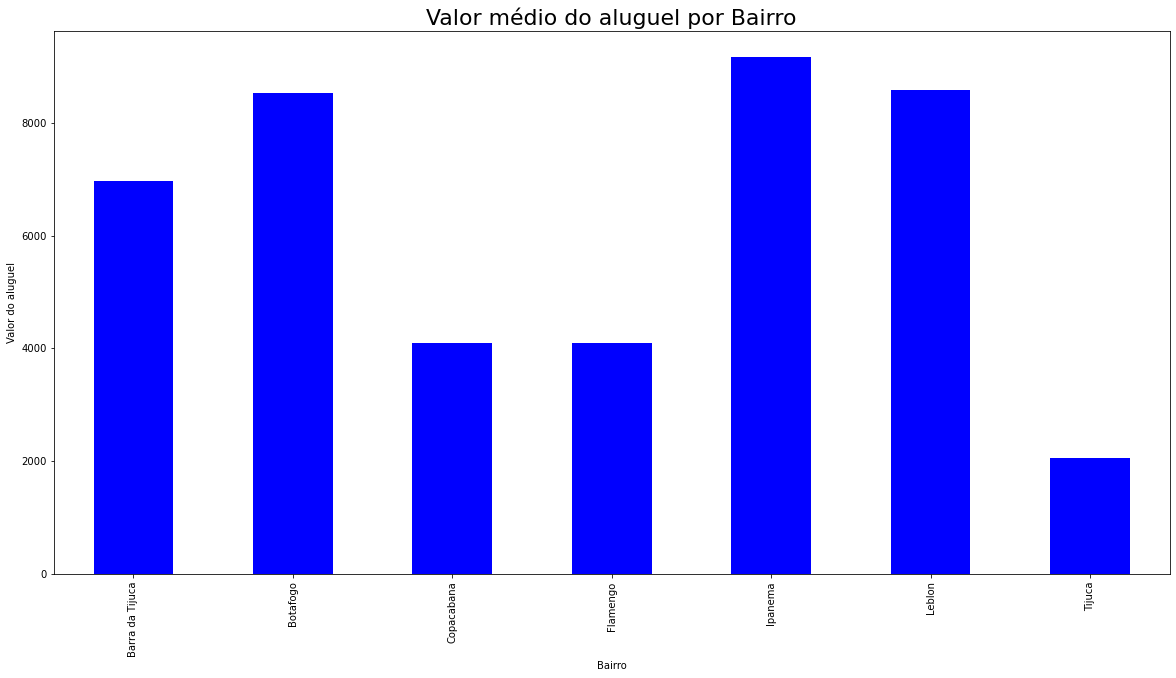

In [57]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio do aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor médio do aluguel por Bairro')

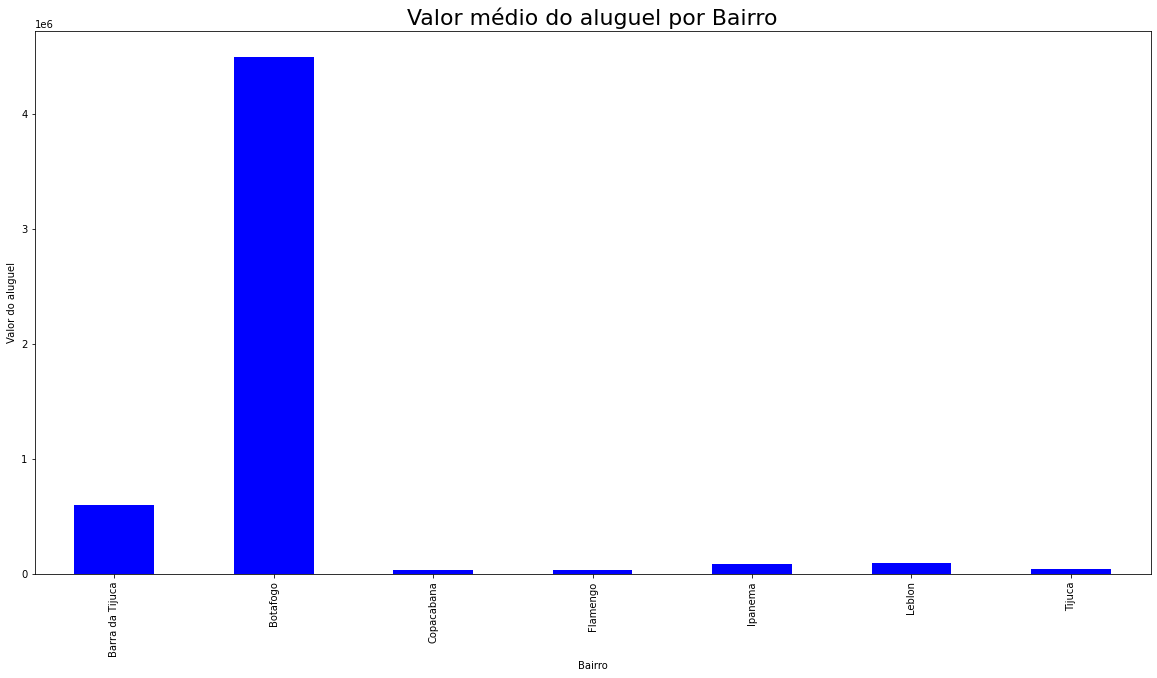

In [58]:
fig = grupo_bairro['Valor'].max().plot.bar(color='blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio do aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor médio do aluguel por Bairro')

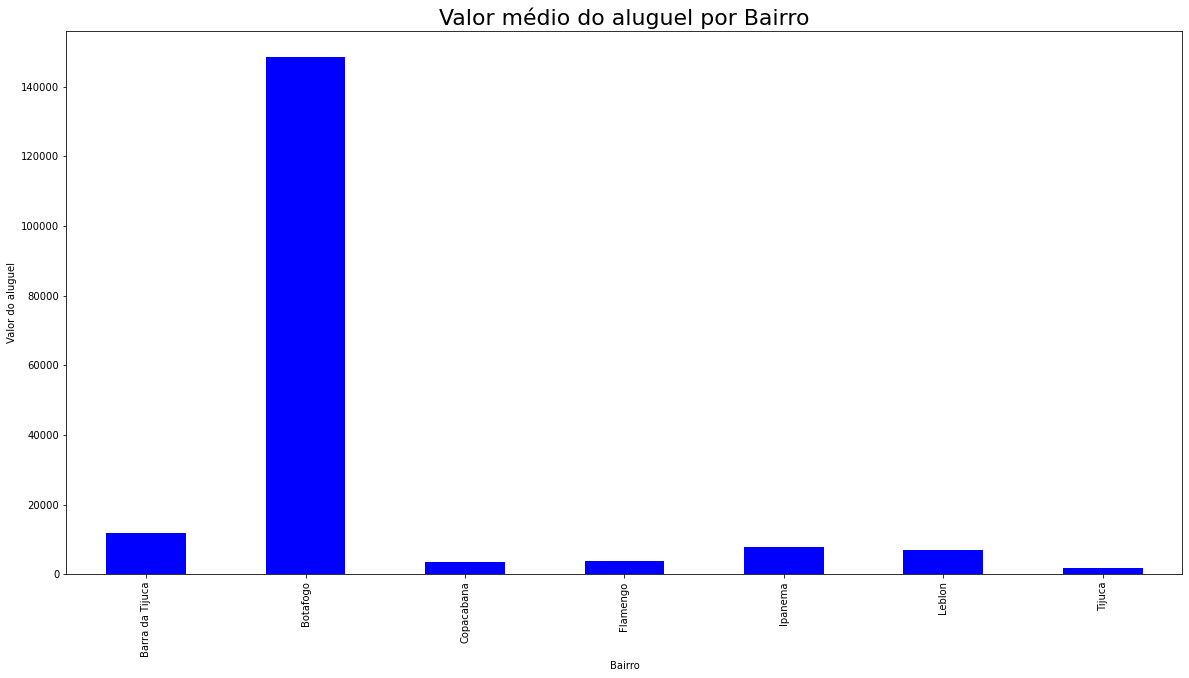

In [59]:
fig = grupo_bairro['Valor'].std().plot.bar(color='blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio do aluguel por Bairro', {'fontsize': 22})

#### Extra

In [60]:
### criando faixas de valor

In [61]:
classes = [0, 2, 4, 6, 10]
# lista com o valor minimo e os limites

In [62]:
quartos = pd.cut(dados['Quartos'], classes)
quartos

0        (0, 2]
5        (4, 6]
9        (0, 2]
10       (0, 2]
11       (2, 4]
          ...  
22359    (2, 4]
22360    (2, 4]
22361    (0, 2]
22363    (4, 6]
22368    (0, 2]
Name: Quartos, Length: 12656, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 10]]

In [63]:
pd.value_counts(quartos)
# o parenteses sig intervalo aberto, ou seja, o valor n entra
# o colchetes sig intervalo fechado, ou seja, o valor é incluído

(2, 4]     6236
(0, 2]     5841
(4, 6]      463
(6, 10]      26
Name: Quartos, dtype: int64

In [64]:
labels = ['1 a 2 quartos', '3 a 4 quartos', '5 a 6 quartos', '7 quartos ou mais']
quartos = pd.cut(dados['Quartos'], classes, labels = labels)
pd.value_counts(quartos)
# o método cut é uma ferramenta do pandas que auxilia na criação distribuições de frequências
# além disso, é possível criar labels para as classes criadas pela função
# mas também a função cut() permite que sejam especificados os limites de cada classe

3 a 4 quartos        6236
1 a 2 quartos        5841
5 a 6 quartos         463
7 quartos ou mais      26
Name: Quartos, dtype: int64

In [65]:
labels = ['0 a 2 quartos', '3 a 4 quartos', '5 a 6 quartos', '7 quartos ou mais']
quartos = pd.cut(dados['Quartos'], classes, labels = labels, include_lowest = True)
pd.value_counts(quartos)
# percebe-se que com o attr include_lowest, o pandas passou a considerar o valor 0

3 a 4 quartos        6236
0 a 2 quartos        5928
5 a 6 quartos         463
7 quartos ou mais      26
Name: Quartos, dtype: int64

### Parte 9

In [66]:
## Identificando e removendo os Outliers

In [67]:
plt.rc('figure', figsize=(14, 6))

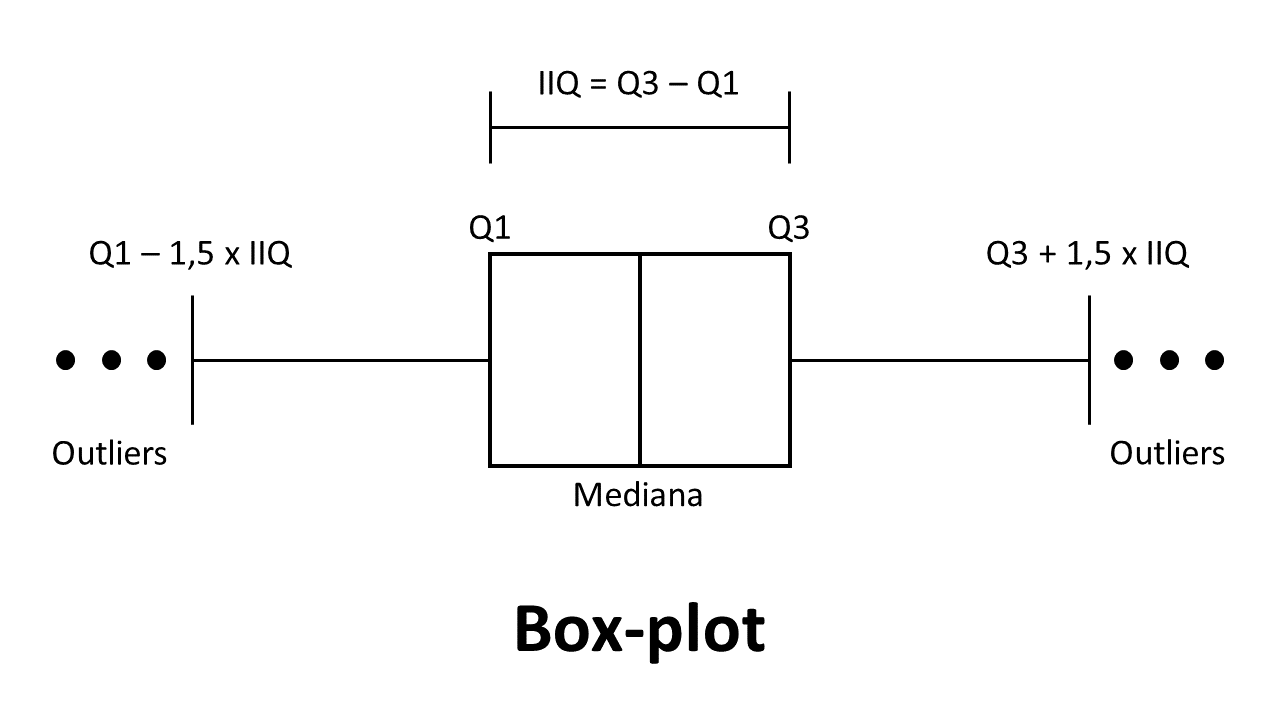

In [68]:
# será utilizado a tecnica do box-plot para remoção dos outliers

<AxesSubplot:>

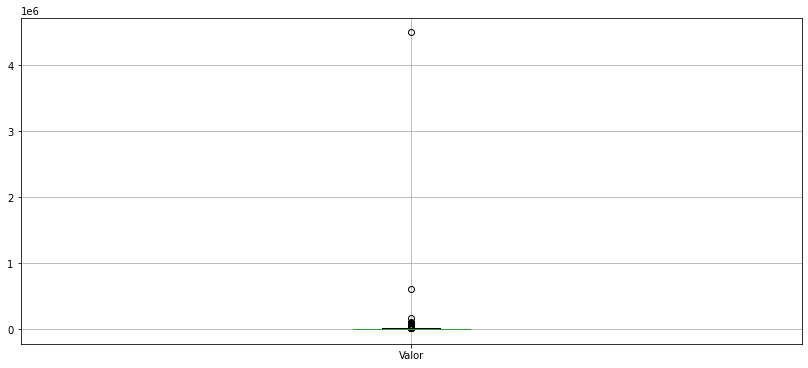

In [69]:
dados.boxplot(['Valor'])
# note os outliers

In [70]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7824,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
15903,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [71]:
valor = dados['Valor']

In [72]:
# Calculando quartis
Q1 = valor.quantile(.25)
Q1

2300.0

In [73]:
Q3 = valor.quantile(.75)
Q3

7200.0

In [74]:
IIQ = Q3 - Q1
IIQ

4900.0

In [75]:
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [76]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_novos = dados[selecao]

<AxesSubplot:>

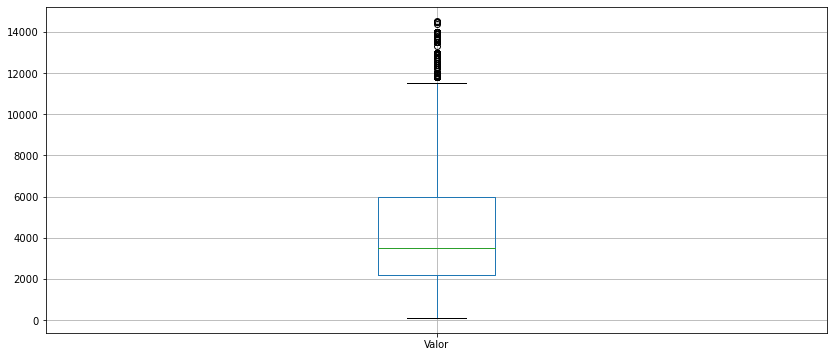

In [77]:
dados_novos.boxplot(['Valor'])
# note que o boxplot foi recalculado gerando novos outliers. Cabe nesses momentos analisar se esses valores já são compreendidos na realidade ou não.
# outras análises estatísticas podem ser necessárias

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

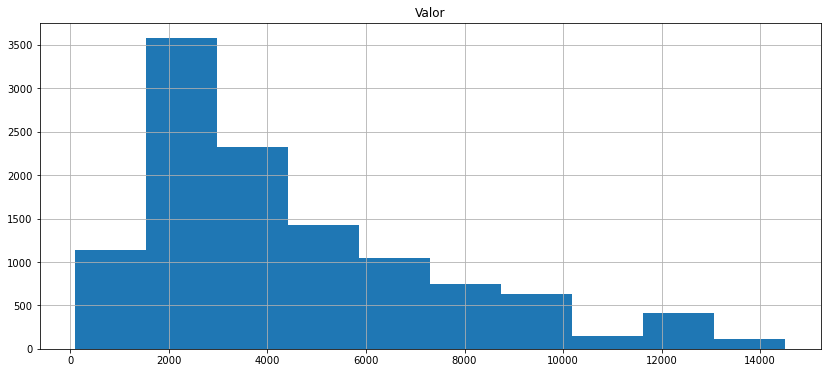

In [78]:
dados_novos.hist(['Valor'])

#### Exercício

In [79]:
dataset = pd.read_csv("F:/Git/data-science/aprendizado/datasets/aluguel/aluguel_amostra.csv", sep=";")

In [80]:
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


<AxesSubplot:>

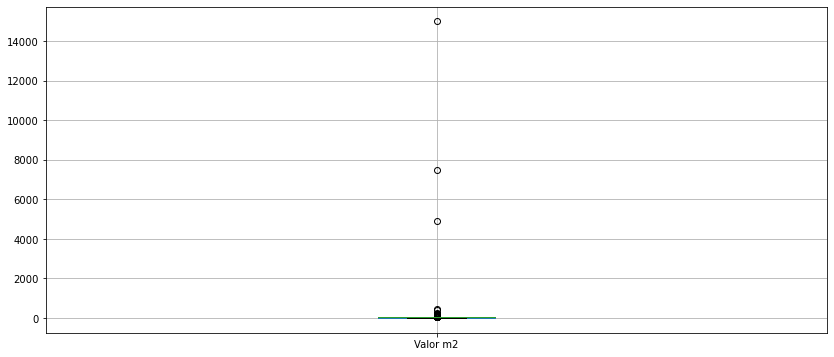

In [81]:
dataset.boxplot(['Valor m2'])

In [82]:
dataset_valor = dataset['Valor m2']
Q1 = dataset_valor.quantile(.25).round(2)

In [83]:
Q3 = dataset_valor.quantile(.75).round(2)

In [84]:
IIQ = (Q3 - Q1).round(2)

In [85]:
limite_inf = (Q1 - 1.5 * IIQ).round(2)
limite_sup = (Q3 + 1.5 * IIQ).round(2)

In [86]:
print(f"Q1={Q1}\nQ3={Q3}\nIIQ={IIQ}\nlimite inferior={limite_inf}\nlimite_superior={limite_sup}")

Q1=21.25
Q3=42.31
IIQ=21.06
limite inferior=-10.34
limite_superior=73.9


In [87]:
### Removendo Outliers Continuação

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

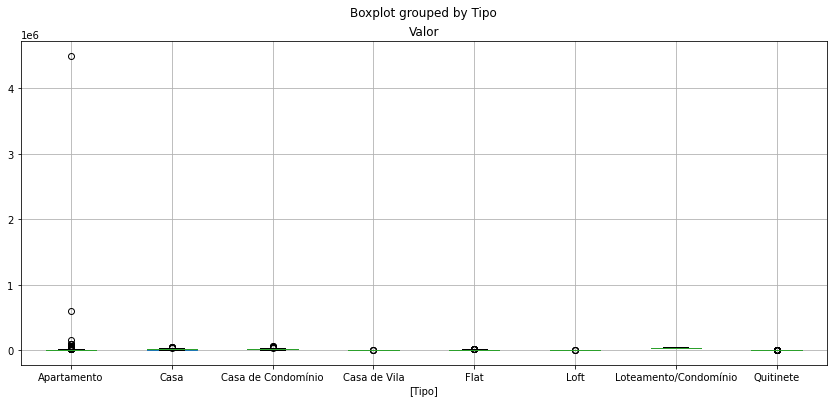

In [88]:
dados.boxplot(['Valor'], by=['Tipo'])

In [89]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [90]:
Q1 = grupo_tipo.quantile(.25).round(2)
Q3 = grupo_tipo.quantile(.75).round(2)
IIQ = (Q3 - Q1).round(2)
limite_inf = (Q1 - 1.5 * IIQ).round(2)
limite_sup = (Q3 + 1.5 * IIQ).round(2)

In [91]:
Q1

Tipo
Apartamento               2400.0
Casa                      5950.0
Casa de Condomínio        9000.0
Casa de Vila              2200.0
Flat                      2500.0
Loft                      2050.0
Loteamento/Condomínio    28750.0
Quitinete                 1100.0
Name: Valor, dtype: float64

In [92]:
Q3

Tipo
Apartamento               7000.0
Casa                     18000.0
Casa de Condomínio       20000.0
Casa de Vila              3990.0
Flat                      6500.0
Loft                      3429.5
Loteamento/Condomínio    36250.0
Quitinete                 1650.0
Name: Valor, dtype: float64

In [93]:
IIQ

Tipo
Apartamento               4600.0
Casa                     12050.0
Casa de Condomínio       11000.0
Casa de Vila              1790.0
Flat                      4000.0
Loft                      1379.5
Loteamento/Condomínio     7500.0
Quitinete                  550.0
Name: Valor, dtype: float64

In [94]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Flat
Loft
Loteamento/Condomínio
Quitinete


In [95]:
dados_novo = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limites = (dados['Valor'] >= limite_inf[tipo]) & (dados['Valor'] <= limite_sup[tipo])
    selecao = eh_tipo & eh_dentro_limites
    dados_selecao = dados[selecao]
    dados_novo = pd.concat([dados_novo, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

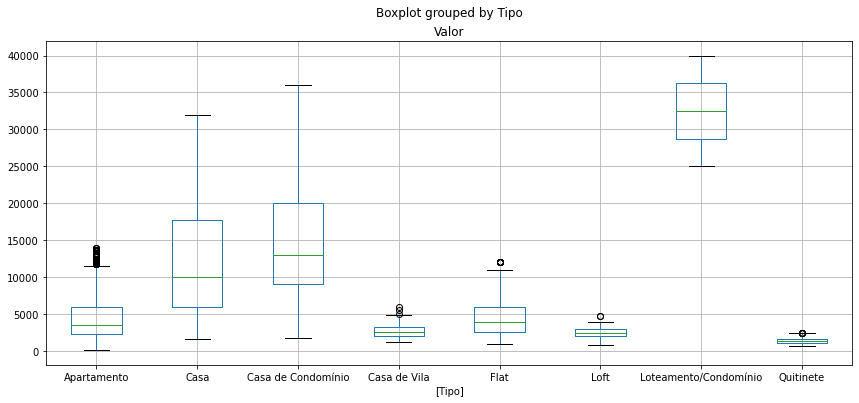

In [96]:
dados_novo.boxplot(['Valor'], by=['Tipo'])

In [97]:
dados_novo.to_csv('aluguel_residencial_sem_outliers.csv', sep=';', index=False)

#### Extra 

In [98]:
plt.rc('figure', figsize=(15, 8))
dataset = pd.read_csv("aluguel_residencial_sem_outliers.csv", sep=";")
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
1,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
2,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
3,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
4,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento
5,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento
6,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0,15.62,Apartamento
7,Apartamento,Barra da Tijuca,3,3,1,175,4200.0,1500.0,500.0,24.00,Apartamento
8,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,0.0,32.89,Apartamento
9,Apartamento,Copacabana,3,1,2,378,10000.0,2150.0,700.0,26.46,Apartamento


In [99]:
area = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [100]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [101]:
g1.scatter(dataset['Valor'], dataset['Area'])
g1.set_title('Valor X Área')

g2.hist(dataset['Valor'])
g2.set_title('Histograma')

dados_g3 = dataset['Valor'].sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (valor)')

grupo = dataset.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor médio por tipo')

Text(0.5, 1.0, 'Valor médio por tipo')

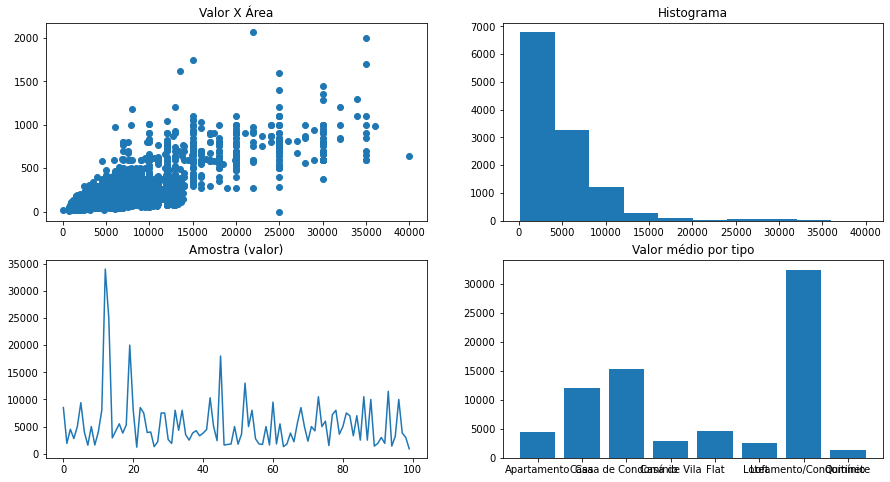

In [102]:
area

In [103]:
## salvando a imagem

In [104]:
area.savefig('grafico.png', dpi=300, bbox_inches='tight')
# o bbox_inches remove a borda ao redor da imagem